In [7]:
!pip install mlxtend
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules

In [8]:
moviedata = pd.read_csv('my_movies.csv')
moviedata

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [9]:
moviedata.drop(columns =['V1','V2','V3','V4','V5']) 
df = pd.get_dummies(moviedata)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


Now, we can generate frequent itemsets based on support

Here we need to set the minimum support value between [0,1]. Using min_supp = 50% means we only want itemsets that co-occur more than half of the time.¶

In [10]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(df, min_support=0.002,use_colnames=True,max_len=3)
freq_items.head()
print(freq_items.shape)

(342, 2)


In [11]:
rules = association_rules(freq_items, metric='lift', min_threshold=0.2)

In [12]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80


We can see that there are quite a few rules with a high lift value which means that it occurs more frequently than would be expected given the number of transaction and Movie combinations.

In [13]:
rules [ (rules['lift'] >1.1)  & (rules['confidence']> 0.8)  ]
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80


# Subsetting the lift and confidence values return you with the itemsets that are relatively correlated in this data.

In [14]:
lift_association = association_rules(freq_items, metric="lift", min_threshold=1)
print(lift_association.shape)
lift_association.head()

(1472, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf


In [15]:
#Eliminating redudancy sets
redundancy = lift_association.sort_values(by=['leverage','confidence'],axis=0, ascending=False).reset_index()
redundancy = redundancy.drop(['index'], axis=1)
redundancy.shape
redundancy.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
1,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
2,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
3,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
4,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [16]:
unique_rules = redundancy.iloc[::2]
unique_rules.head()
unique_rules.shape

(736, 9)

In [17]:
top_10 = unique_rules[unique_rules['lift']>2]
top_10_sort = top_10.sort_values(by='lift', ascending=False)
top_10_sort.reset_index(inplace=True)

In [18]:
top_10_sort = top_10_sort.drop(['index'],axis=1)

In [19]:
top_10_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(V5_LOTR2, V1_Sixth Sense)",(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
1,"(Harry Potter2, Harry Potter1)",(V1_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
2,"(Green Mile, LOTR2)",(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
3,"(Green Mile, LOTR2)",(V5_LOTR2),0.1,0.1,0.1,1.0,10.0,0.09,inf
4,"(V2_LOTR2, LOTR2)",(V1_LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf


Visualization Results

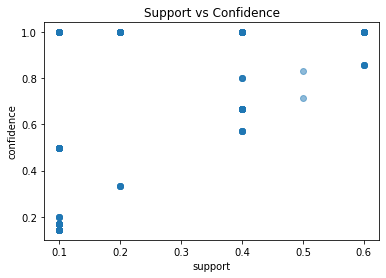

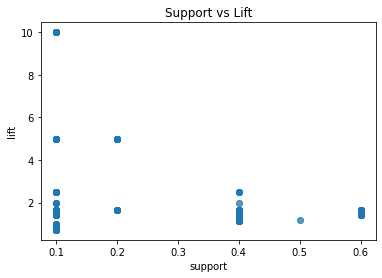

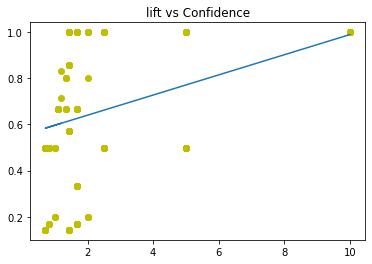

In [20]:
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()
plt.scatter(rules['support'],rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.title('lift vs Confidence')
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))